<img src="./rladies/rladies.png" width = '300' />

# COVID-19: Analyse exploratoire.
Par **Hani Bounoua**

Les données explorer dans cette analyse proviennent d'un repo sur Github du [**Center for Systems Science and Engineering (CSSE)**](https://github.com/CSSEGISandData/COVID-19) de [**Johns Hopkins University**](https://www.jhu.edu/) qui date du (23 mars 2020).

## Préparation des données:

### Chargement des packages:

* **Tidyverse**:
    + **dplyr**.
    + **tidyr**.
    + **ggplot**.
* **Lubridate**:

In [1]:
library(tidyverse)
library(lubridate)
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



### Importer les données:

In [2]:
confirmed <- read_csv(file = './dataIn/time_series_19-covid-Confirmed.csv')
deaths <- read_csv(file = './dataIn/time_series_19-covid-Deaths.csv')
recovered <- read_csv(file = './dataIn/time_series_19-covid-Recovered.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)
See spec(...) for full column specifications.


### Inspection des données:

#### Dimensions:

In [3]:
dim(confirmed)
dim(deaths)
dim(recovered)

[1] 487  65

[1] 487  65

[1] 487  65

#### Nom des colonnes:

In [4]:
print('Confirmed:')
colnames(confirmed)
print('Deaths:')
colnames(deaths)
print('Recovered:')
colnames(recovered)

[1] "Confirmed:"


[1] "Province/State" "Country/Region" "Lat"            "Long"          
 [5] "1/22/20"        "1/23/20"        "1/24/20"        "1/25/20"       
 [9] "1/26/20"        "1/27/20"        "1/28/20"        "1/29/20"       
[13] "1/30/20"        "1/31/20"        "2/1/20"         "2/2/20"        
[17] "2/3/20"         "2/4/20"         "2/5/20"         "2/6/20"        
[21] "2/7/20"         "2/8/20"         "2/9/20"         "2/10/20"       
[25] "2/11/20"        "2/12/20"        "2/13/20"        "2/14/20"       
[29] "2/15/20"        "2/16/20"        "2/17/20"        "2/18/20"       
[33] "2/19/20"        "2/20/20"        "2/21/20"        "2/22/20"       
[37] "2/23/20"        "2/24/20"        "2/25/20"        "2/26/20"       
[41] "2/27/20"        "2/28/20"        "2/29/20"        "3/1/20"        
[45] "3/2/20"         "3/3/20"         "3/4/20"         "3/5/20"        
[49] "3/6/20"         "3/7/20"         "3/8/20"         "3/9/20"        
[53] "3/10/20"        "3/11/20"        "3/12/20"        "3/13/20"       
[57] "3/14/20"        "3/15/20"        "3/16/20"        "3/17/20"       
[61] "3/18/20"        "3/19/20"        "3/20/20"        "3/21/20"       
[65] "3/22/20"

[1] "Deaths:"


[1] "Province/State" "Country/Region" "Lat"            "Long"          
 [5] "1/22/20"        "1/23/20"        "1/24/20"        "1/25/20"       
 [9] "1/26/20"        "1/27/20"        "1/28/20"        "1/29/20"       
[13] "1/30/20"        "1/31/20"        "2/1/20"         "2/2/20"        
[17] "2/3/20"         "2/4/20"         "2/5/20"         "2/6/20"        
[21] "2/7/20"         "2/8/20"         "2/9/20"         "2/10/20"       
[25] "2/11/20"        "2/12/20"        "2/13/20"        "2/14/20"       
[29] "2/15/20"        "2/16/20"        "2/17/20"        "2/18/20"       
[33] "2/19/20"        "2/20/20"        "2/21/20"        "2/22/20"       
[37] "2/23/20"        "2/24/20"        "2/25/20"        "2/26/20"       
[41] "2/27/20"        "2/28/20"        "2/29/20"        "3/1/20"        
[45] "3/2/20"         "3/3/20"         "3/4/20"         "3/5/20"        
[49] "3/6/20"         "3/7/20"         "3/8/20"         "3/9/20"        
[53] "3/10/20"        "3/11/20"        "3/12/20"        "3/13/20"       
[57] "3/14/20"        "3/15/20"        "3/16/20"        "3/17/20"       
[61] "3/18/20"        "3/19/20"        "3/20/20"        "3/21/20"       
[65] "3/22/20"

[1] "Recovered:"


[1] "Province/State" "Country/Region" "Lat"            "Long"          
 [5] "1/22/20"        "1/23/20"        "1/24/20"        "1/25/20"       
 [9] "1/26/20"        "1/27/20"        "1/28/20"        "1/29/20"       
[13] "1/30/20"        "1/31/20"        "2/1/20"         "2/2/20"        
[17] "2/3/20"         "2/4/20"         "2/5/20"         "2/6/20"        
[21] "2/7/20"         "2/8/20"         "2/9/20"         "2/10/20"       
[25] "2/11/20"        "2/12/20"        "2/13/20"        "2/14/20"       
[29] "2/15/20"        "2/16/20"        "2/17/20"        "2/18/20"       
[33] "2/19/20"        "2/20/20"        "2/21/20"        "2/22/20"       
[37] "2/23/20"        "2/24/20"        "2/25/20"        "2/26/20"       
[41] "2/27/20"        "2/28/20"        "2/29/20"        "3/1/20"        
[45] "3/2/20"         "3/3/20"         "3/4/20"         "3/5/20"        
[49] "3/6/20"         "3/7/20"         "3/8/20"         "3/9/20"        
[53] "3/10/20"        "3/11/20"        "3/12/20"        "3/13/20"       
[57] "3/14/20"        "3/15/20"        "3/16/20"        "3/17/20"       
[61] "3/18/20"        "3/19/20"        "3/20/20"        "3/21/20"       
[65] "3/22/20"

#### Valeurs manquantes:

In [5]:
print('Confirmed:')
colSums(is.na(confirmed))
print('Deaths:')
colSums(is.na(deaths))
print('Recovered:')
colSums(is.na(recovered))

[1] "Confirmed:"


Province/State Country/Region            Lat           Long        1/22/20 
           162              0              0              0              0 
       1/23/20        1/24/20        1/25/20        1/26/20        1/27/20 
             0              0              0              0              0 
       1/28/20        1/29/20        1/30/20        1/31/20         2/1/20 
             0              0              0              0              0 
        2/2/20         2/3/20         2/4/20         2/5/20         2/6/20 
             0              0              0              0              0 
        2/7/20         2/8/20         2/9/20        2/10/20        2/11/20 
             0              0              0              0              0 
       2/12/20        2/13/20        2/14/20        2/15/20        2/16/20 
             0              0              0              0              0 
       2/17/20        2/18/20        2/19/20        2/20/20        2/21/20 
             0              0              0              0              0 
       2/22/20        2/23/20        2/24/20        2/25/20        2/26/20 
             0              0              0              0              0 
       2/27/20        2/28/20        2/29/20         3/1/20         3/2/20 
             0              0              0              0              0 
        3/3/20         3/4/20         3/5/20         3/6/20         3/7/20 
             0              0              0              0              0 
        3/8/20         3/9/20        3/10/20        3/11/20        3/12/20 
             0              0              0              0              0 
       3/13/20        3/14/20        3/15/20        3/16/20        3/17/20 
             0              0              0              0              0 
       3/18/20        3/19/20        3/20/20        3/21/20        3/22/20 
             0              0              0              0              0

[1] "Deaths:"


Province/State Country/Region            Lat           Long        1/22/20 
           162              0              0              0              0 
       1/23/20        1/24/20        1/25/20        1/26/20        1/27/20 
             0              0              0              0              0 
       1/28/20        1/29/20        1/30/20        1/31/20         2/1/20 
             0              0              0              0              0 
        2/2/20         2/3/20         2/4/20         2/5/20         2/6/20 
             0              0              0              0              0 
        2/7/20         2/8/20         2/9/20        2/10/20        2/11/20 
             0              0              0              0              0 
       2/12/20        2/13/20        2/14/20        2/15/20        2/16/20 
             0              0              0              0              0 
       2/17/20        2/18/20        2/19/20        2/20/20        2/21/20 
             0              0              0              0              0 
       2/22/20        2/23/20        2/24/20        2/25/20        2/26/20 
             0              0              0              0              0 
       2/27/20        2/28/20        2/29/20         3/1/20         3/2/20 
             0              0              0              0              0 
        3/3/20         3/4/20         3/5/20         3/6/20         3/7/20 
             0              0              0              0              0 
        3/8/20         3/9/20        3/10/20        3/11/20        3/12/20 
             0              0              0              0              0 
       3/13/20        3/14/20        3/15/20        3/16/20        3/17/20 
             0              0              0              0              0 
       3/18/20        3/19/20        3/20/20        3/21/20        3/22/20 
             0              0              0              0              0

[1] "Recovered:"


Province/State Country/Region            Lat           Long        1/22/20 
           162              0              0              0              0 
       1/23/20        1/24/20        1/25/20        1/26/20        1/27/20 
             0              0              0              0              0 
       1/28/20        1/29/20        1/30/20        1/31/20         2/1/20 
             0              0              0              0              0 
        2/2/20         2/3/20         2/4/20         2/5/20         2/6/20 
             0              0              0              0              0 
        2/7/20         2/8/20         2/9/20        2/10/20        2/11/20 
             0              0              0              0              0 
       2/12/20        2/13/20        2/14/20        2/15/20        2/16/20 
             0              0              0              0              0 
       2/17/20        2/18/20        2/19/20        2/20/20        2/21/20 
             0              0              0              0              0 
       2/22/20        2/23/20        2/24/20        2/25/20        2/26/20 
             0              0              0              0              0 
       2/27/20        2/28/20        2/29/20         3/1/20         3/2/20 
             0              0              0              0              0 
        3/3/20         3/4/20         3/5/20         3/6/20         3/7/20 
             0              0              0              0              0 
        3/8/20         3/9/20        3/10/20        3/11/20        3/12/20 
             0              0              0              0              0 
       3/13/20        3/14/20        3/15/20        3/16/20        3/17/20 
             0              0              0              0              0 
       3/18/20        3/19/20        3/20/20        3/21/20        3/22/20 
             0              0              0              0              0

### Transformation des données:

In [6]:
diffrence <- function(y, Cases){
    n <- length(Cases)
    x <- rep(0, n)
    x = c(0, Cases[2:n] - Cases[1:(n-1)])
    return(x)
}

new_cases <- function(Data){
    Y <- unique(Data$Province)
    result <- Data[1,] %>%
                mutate(new_cases = 0)
    for(y in Y){
        temp <- Data %>%
            filter(Province == y) %>%
            arrange(Date) %>%
            mutate(new_cases = diffrence(y, Confirmed))
        result <- bind_rows(result, temp)
    }
    return(result[-1,])
}

replace_with <- function(x, y){
    index <- which(is.na(x))
    x[index] <- y[index] 
    return(x)
}

days <- function(Data){
    Y <- unique(Data$Country)
    result <- Data[1,]
    for(y in Y){
        temp <- Data %>%
            filter(Country == y, infected == TRUE) %>%
            arrange(Date) %>%
            mutate(Days = as.numeric(Date - min(Date), unit='days') + 1)
                   
        temp <- bind_rows(temp, filter(Data, Province == y, infected == FALSE))
        result <- bind_rows(result, temp)
    }
    return(result[-1,])
}

#### Redimensionner et Creation de Variables:

In [7]:
confirmed_trasformed <- confirmed %>%
                    rename(Province ='Province/State', Country = 'Country/Region') %>%
                    gather(ends_with('/20'),
                           key = "Date", value = "Confirmed") %>%
                    mutate(Province = replace_with(Province, Country),
                           Date = parse_date_time(Date, "mdy"),
                           infected = Confirmed != 0)
confirmed_trasformed <- new_cases(confirmed_trasformed)

deaths_trasformed <- deaths %>%
                    rename(Province ='Province/State', Country = 'Country/Region') %>%
                    gather(ends_with('/20'),
                           key = "Date", value = "Confirmed") %>%
                    mutate(Province = replace_with(Province, Country),
                           Date = parse_date_time(Date, "mdy"))
deaths_trasformed <- new_cases(deaths_trasformed)

recovered_trasformed <- recovered %>%
                    rename(Province ='Province/State', Country = 'Country/Region') %>%
                    gather(ends_with('/20'),
                           key = "Date", value = "Confirmed") %>%
                    mutate(Province = replace_with(Province, Country),
                           Date = parse_date_time(Date, "mdy"))
recovered_trasformed <- new_cases(recovered_trasformed)

In [8]:
covid19 <- left_join(confirmed_trasformed, deaths_trasformed,
                     by = c('Province', 'Country', 'Lat', 'Long', 'Date'),
                     suffix = c("_cases", "_deaths"))
covid19 <- left_join(covid19, recovered_trasformed,
                     by = c('Province', 'Country', 'Lat', 'Long', 'Date'),
                     suffix = c("", "_recovered"))

In [9]:
covid19 <- covid19 %>%
            arrange(Province, Date) %>%
            mutate(Days = rep(0, length(Date)))

covid19 <- days(covid19)

In [10]:
covid19 <- covid19 %>%
            rename(confirmed = Confirmed_cases, new_confirmed = new_cases_cases,
                   deaths = Confirmed_deaths, new_deaths = new_cases_deaths,
                   recovered = Confirmed, new_recovered = new_cases) %>%
            mutate(active_cases = confirmed - deaths - recovered)

## Exploration des données:

### Resumé de la situation globale dans le monde à la date du 22 mars 2020:

In [12]:
covid19 %>%
        group_by(Date) %>%
        summarize(Confirmed = sum(confirmed),
                  Deaths = sum(deaths),
                  Recovered = sum(recovered),
                  'Active Cases' = sum(active_cases)) %>%
        mutate('Death Rate 1 (%)' = round(100 * Deaths/Confirmed, 2),
               'Death Rate 2 (%)' = round(100 * Deaths/(Deaths + Recovered), 2),
               'Recovered Rate (%)' = round(100 * Recovered/(Deaths + Recovered), 2)) %>%
        filter(Date == max(Date))
# Death Rate Corrigé: Nathan Uyttendaele (Chat Sceptique).
# Docteur en statistiques et vulgarisateur scientifique.


Date,Confirmed,Deaths,Recovered,Active Cases,Death Rate 1 (%),Death Rate 2 (%),Recovered Rate (%)
2020-03-22,335955,14632,97704,223619,4.36,13.03,86.97


### Visualisation des données pandémiques a l'international:

#### Indicateur de suivis de la pandémie:

##### Évolution du nombre cumulé de cas COVID-19 confirmé dans le monde:

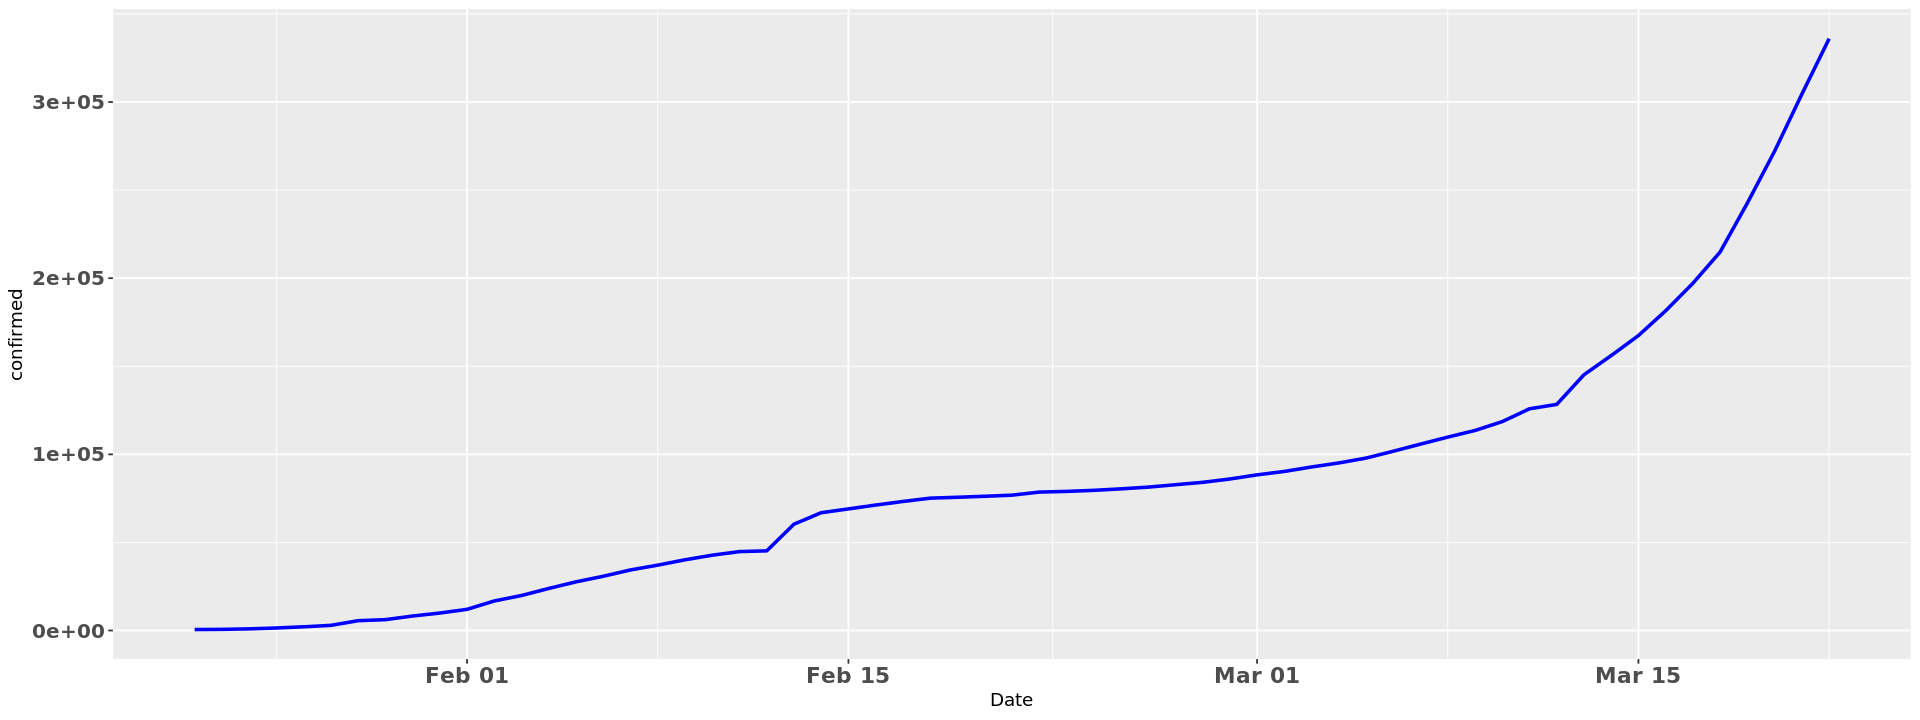

In [29]:
options(repr.plot.width = 16, repr.plot.height = 6)
covid19 %>%
        group_by(Date) %>%
        summarize(confirmed = sum(confirmed)) %>%
ggplot(mapping = aes(x = Date, y = confirmed)) +
        geom_line(size = 1, color = 'blue') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre cumulé de décès causer par le COVID-19 dans le monde:

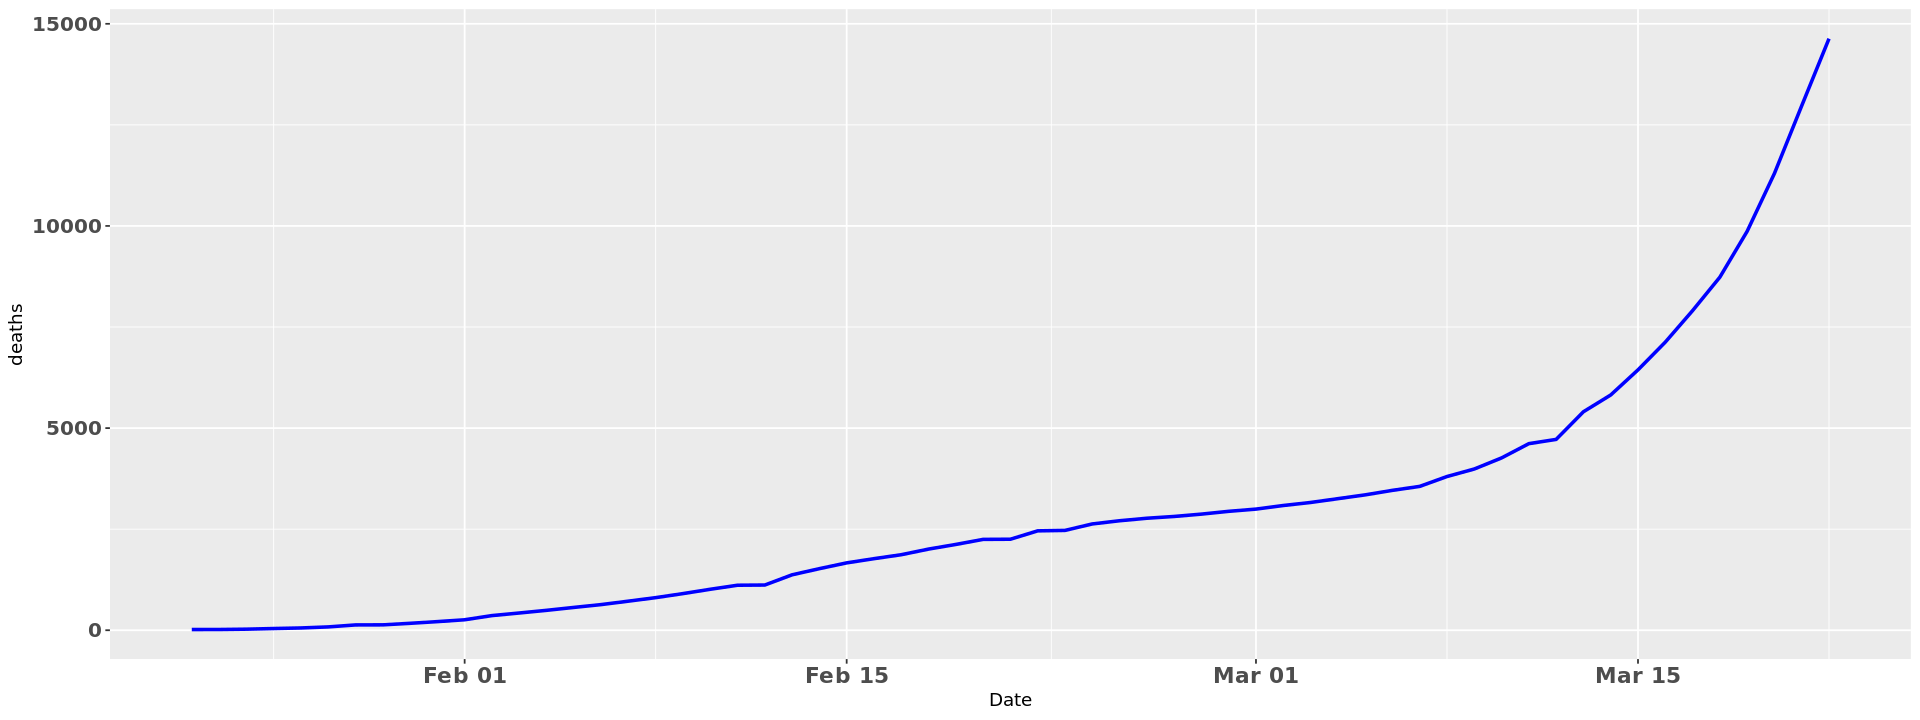

In [19]:
covid19 %>%
        group_by(Date) %>%
        summarize(deaths = sum(deaths)) %>%
ggplot(mapping = aes(x = Date, y = deaths)) +
        geom_line(size = 1, color = 'blue') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre cumulé de cas COVID-19 guérie dans le monde:

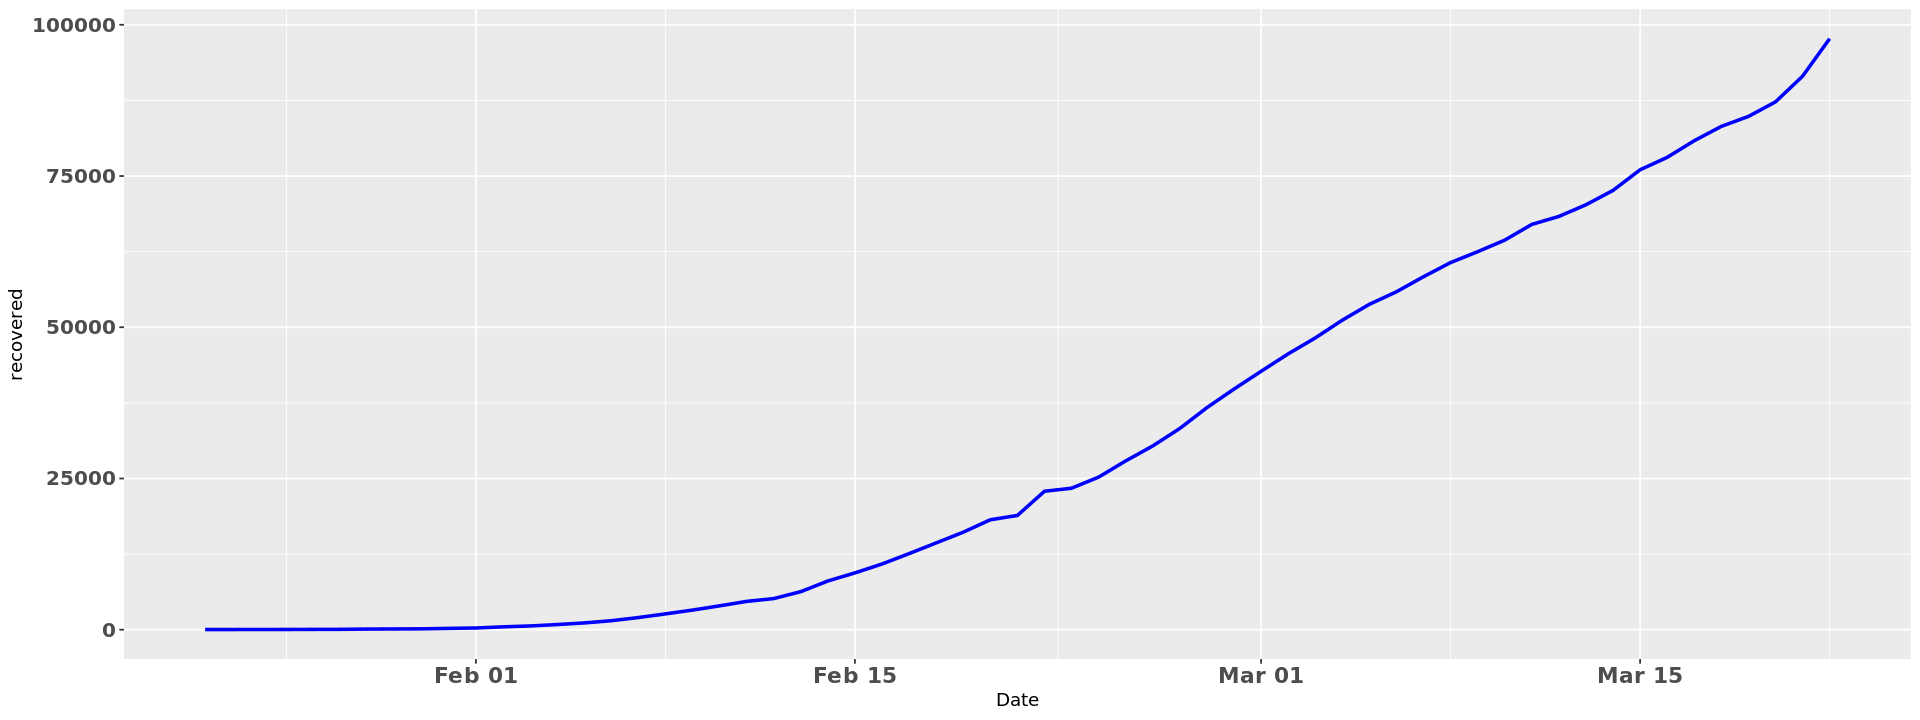

In [20]:
covid19 %>%
        group_by(Date) %>%
        summarize(recovered = sum(recovered)) %>%
ggplot(mapping = aes(x = Date, y = recovered)) +
        geom_line(size = 1, color = 'blue') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du taux de mortalité (Death Rate 1) dans le monde:


$$
\mbox{Death Rate 1} = 100 \times \frac{\mbox{Deaths}}{\mbox{Confirmed}}
$$

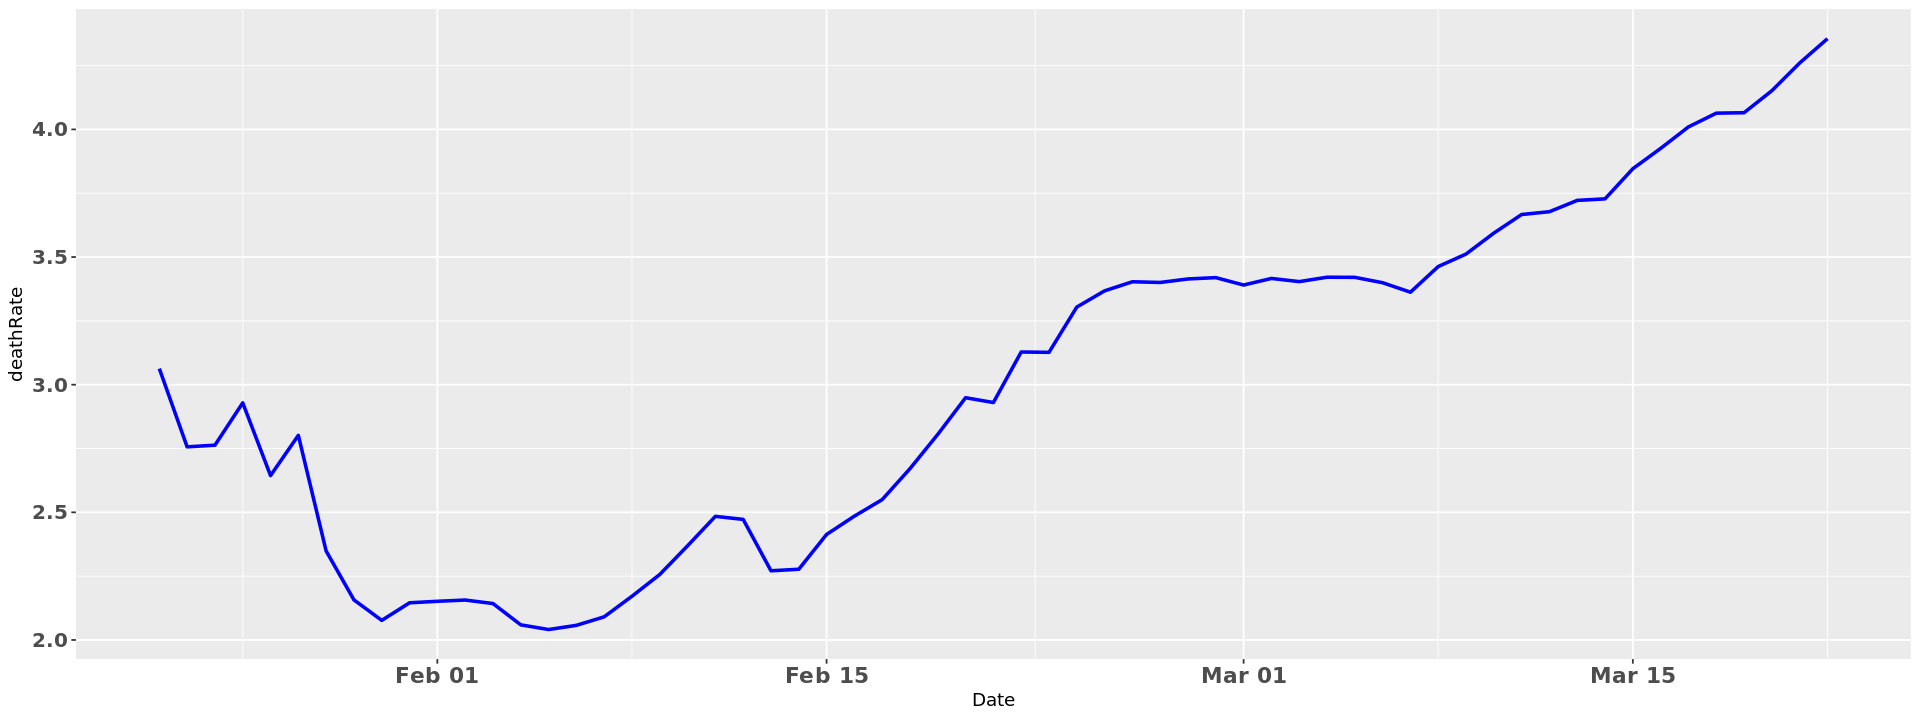

In [21]:
covid19 %>%
        group_by(Date) %>%
        summarize(confirmed = sum(confirmed), deaths = sum(deaths)) %>%
        mutate(deathRate = 100*deaths/confirmed) %>%
        replace_na(replace = list(deathRate = 0))%>%
ggplot(mapping = aes(x = Date, y = deathRate)) +
        geom_line(size = 1, color = 'blue') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du taux de mortalité (Death Rate 2) dans le monde:

$$
\mbox{Death Rate 2} = 100 \times \frac{\mbox{Deaths}}{\mbox{Deaths} + \mbox{Recovered}}
$$


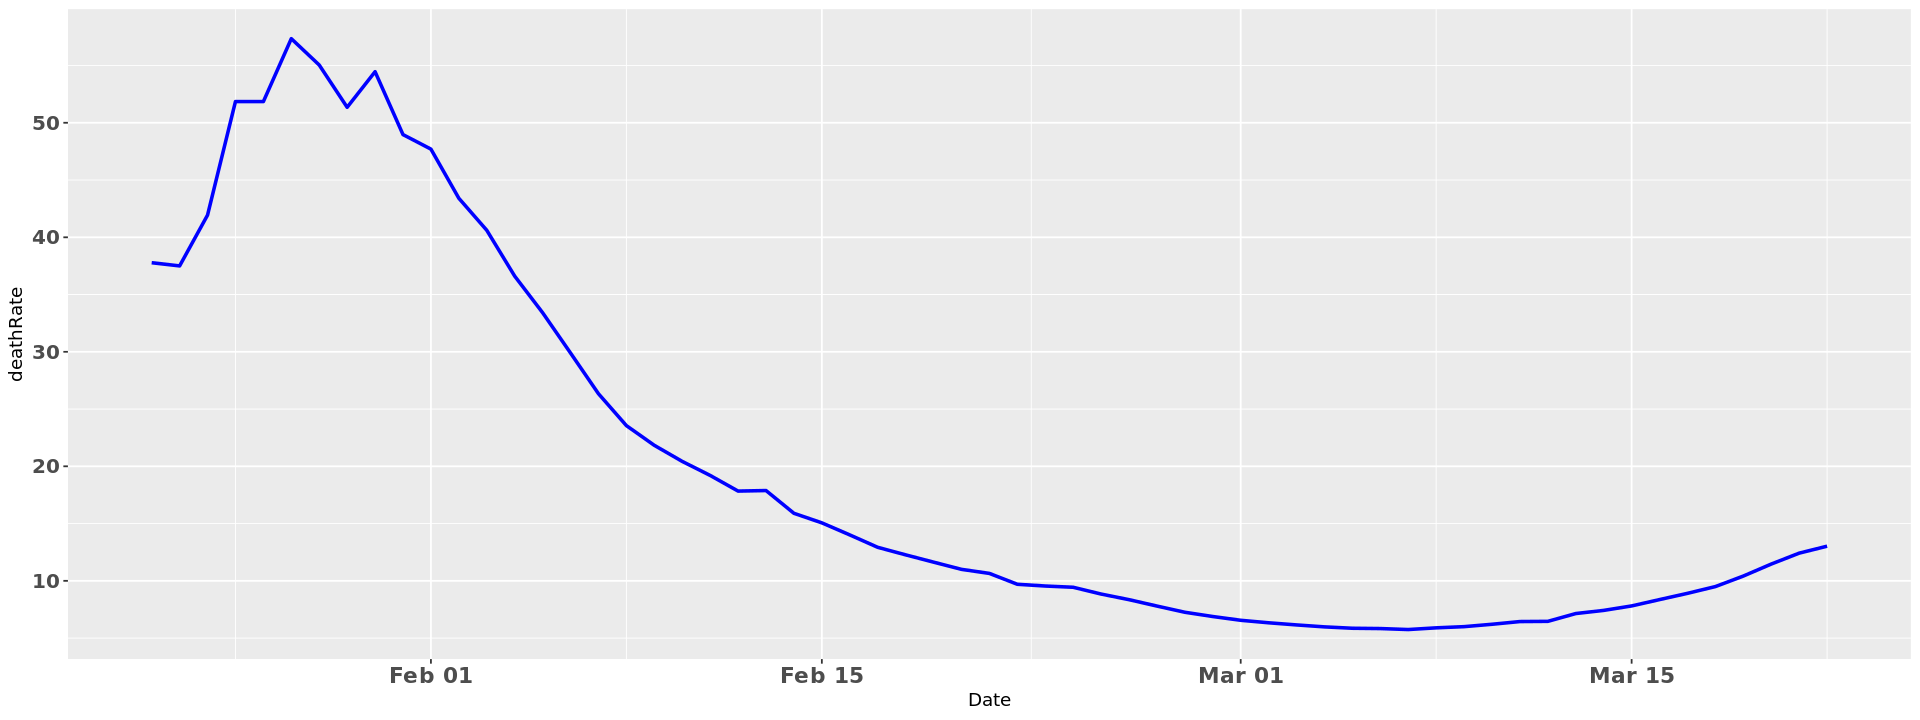

In [22]:
covid19 %>%
        group_by(Date) %>%
        summarize(confirmed = sum(confirmed), deaths = sum(deaths), recovered = sum(recovered)) %>%
        mutate(deathRate = 100*deaths/(deaths + recovered)) %>%
        replace_na(replace = list(deathRate = 0))%>%
ggplot(mapping = aes(x = Date, y = deathRate)) +
        geom_line(size = 1, color = 'blue') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre cas COVID-19 actifs dans le monde:

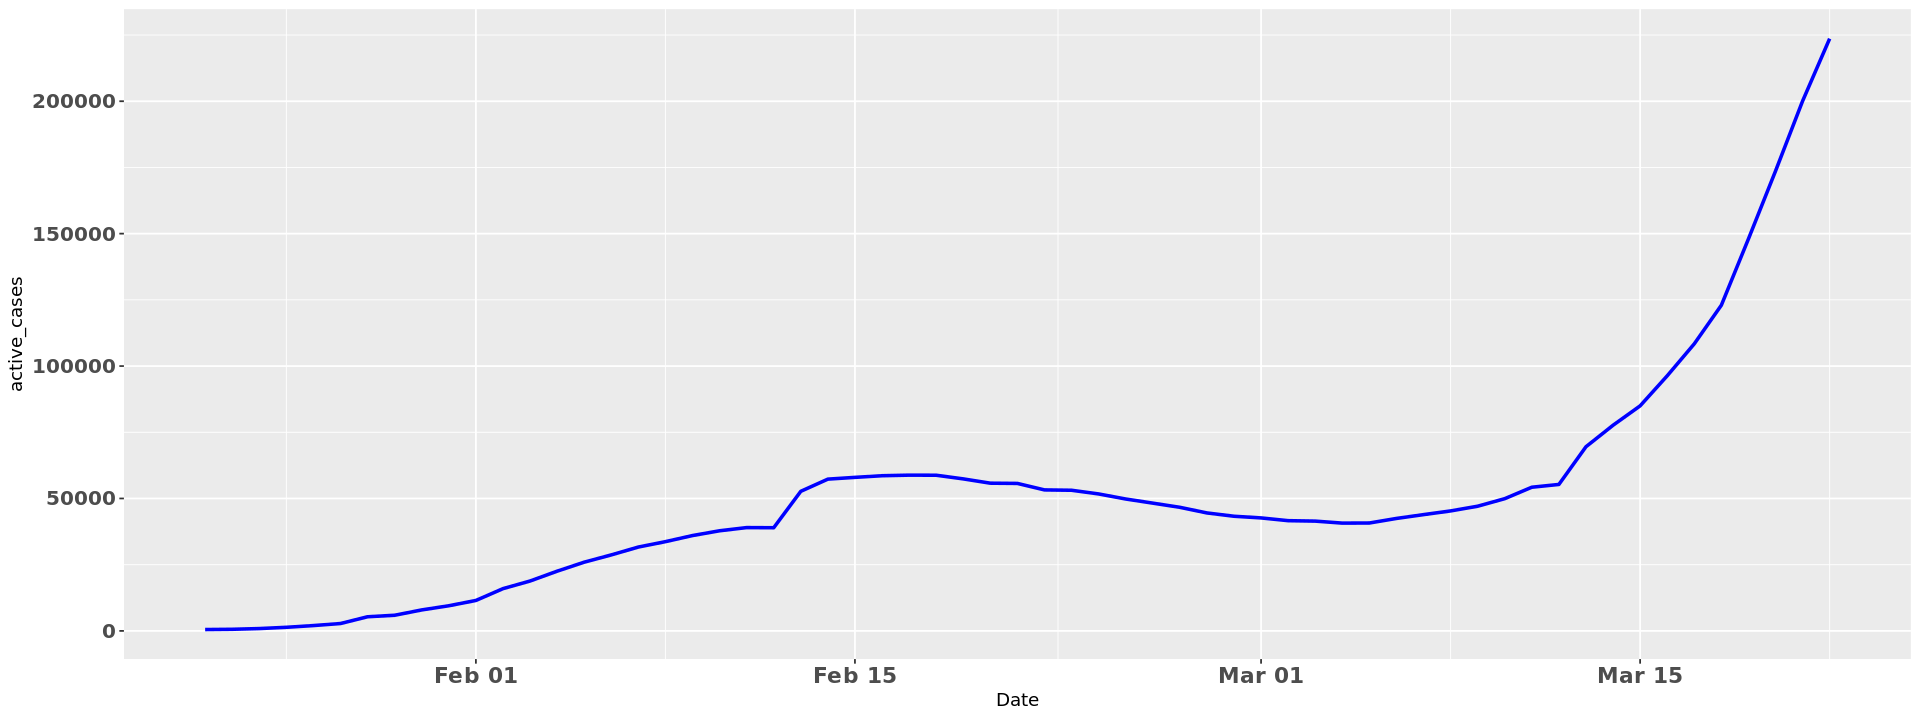

In [23]:
covid19 %>%
        group_by(Date) %>%
        summarize(active_cases = sum(active_cases)) %>%
ggplot(mapping = aes(x = Date, y = active_cases)) +
        geom_line(size = 1, color = 'blue') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

#### Indicateur de suivis de l'impacte des mesures prises par les états:

In [24]:
covid19 %>%
        group_by(Date) %>%
        summarize('New Confirmed' = sum(new_confirmed),
                  'New Deaths' = sum(new_deaths),
                  'New Recovered' = sum(new_recovered),
                  'Active Cases' = sum(active_cases)) %>%
        filter(Date >= parse_date_time('03-16-2020', 'mdy')) %>%
        arrange(desc(Date))

Date,New Confirmed,New Deaths,New Recovered,Active Cases
2020-03-22,31419,1658,6203,223619
2020-03-21,32352,1674,4243,200052
2020-03-20,29452,1432,2402,173611
2020-03-19,27795,1134,1647,147987
2020-03-18,17764,828,2367,122970
2020-03-17,15613,779,2752,108397
2020-03-16,14081,686,2053,96313



##### Évolution du nombre de nouveaux cas COVID-19 dépisté dans le monde:

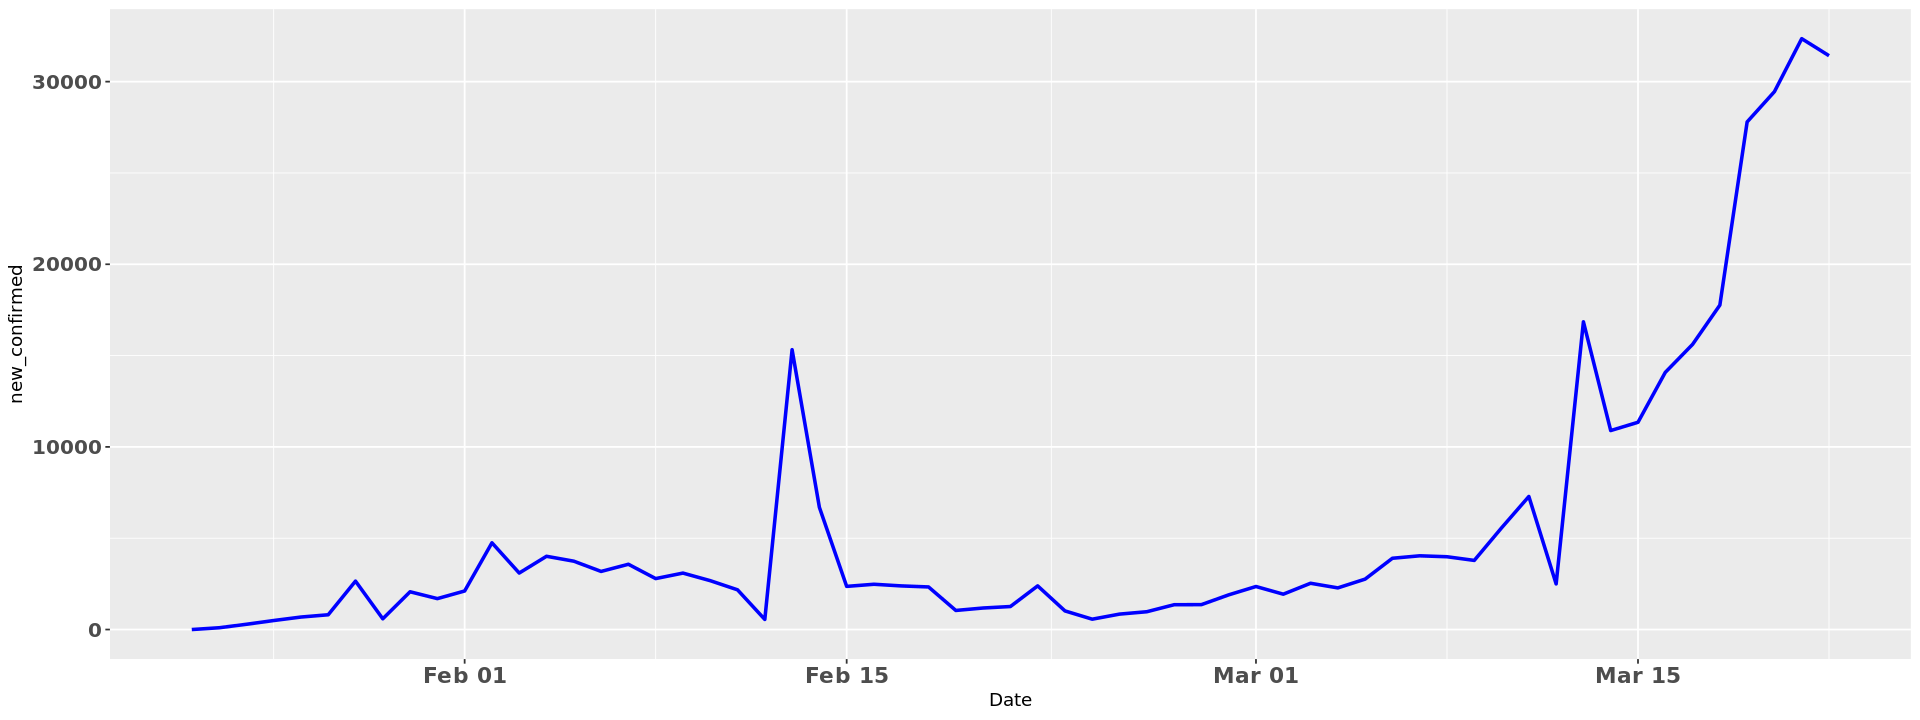

In [54]:
covid19 %>%
        group_by(Date) %>%
        summarize(new_confirmed = sum(new_confirmed)) %>%
ggplot(mapping = aes(x = Date, y = new_confirmed)) +
        geom_line(size = 1, color = 'blue') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre de nouveaux décès COVID-19 enregistré dans le monde:

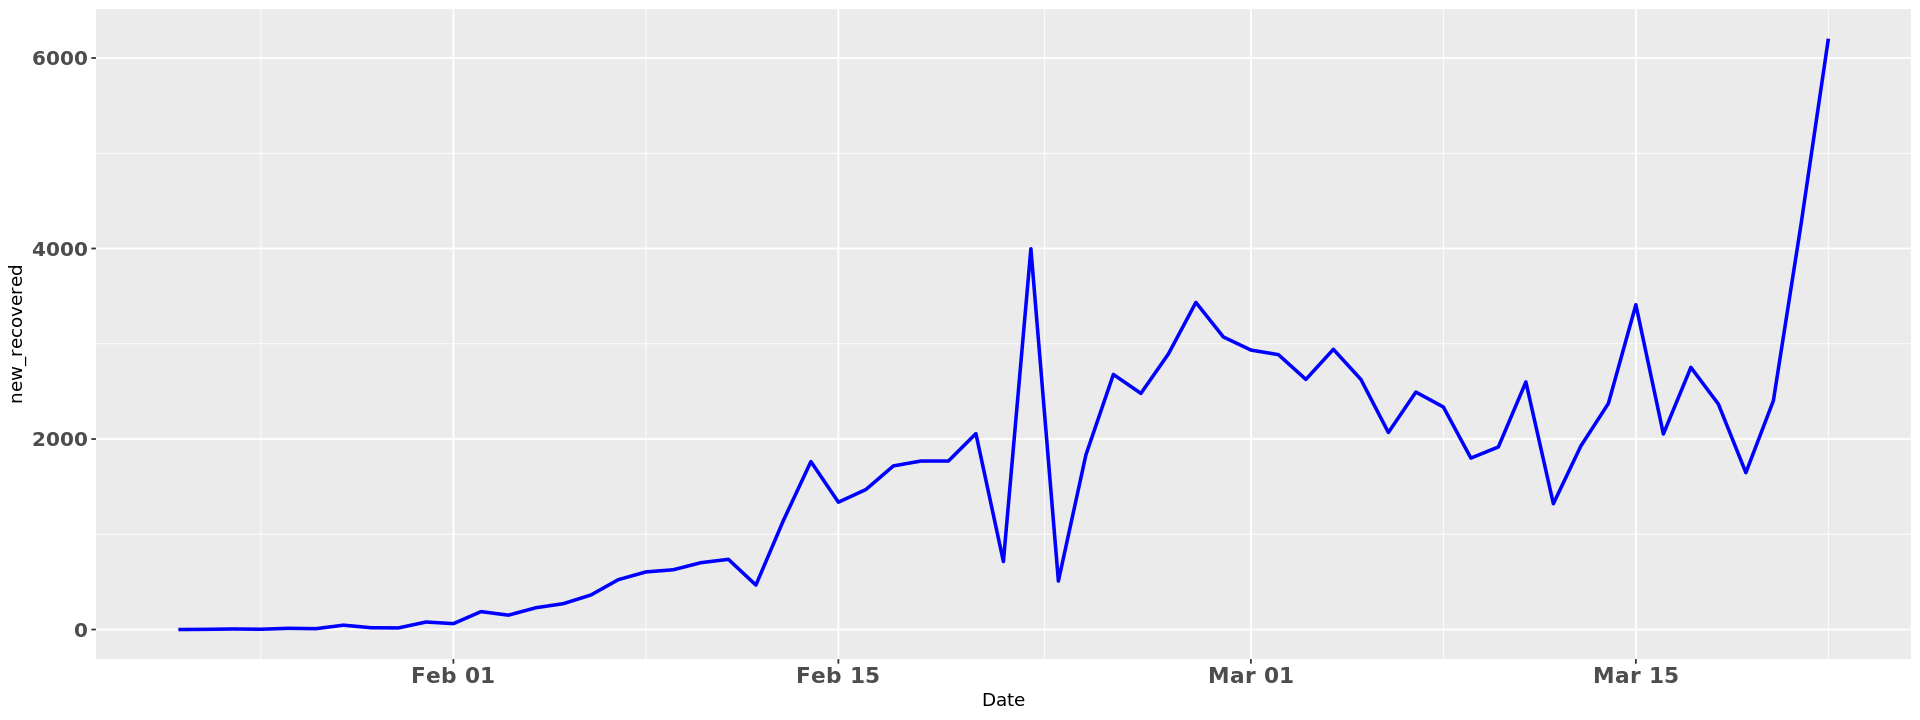

In [53]:
covid19 %>%
        group_by(Date) %>%
        summarize(new_recovered = sum(new_recovered)) %>%
ggplot(mapping = aes(x = Date, y = new_recovered)) +
        geom_line(size = 1, color = 'blue') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre de nouveaux cas COVID-19 géris dans le monde:

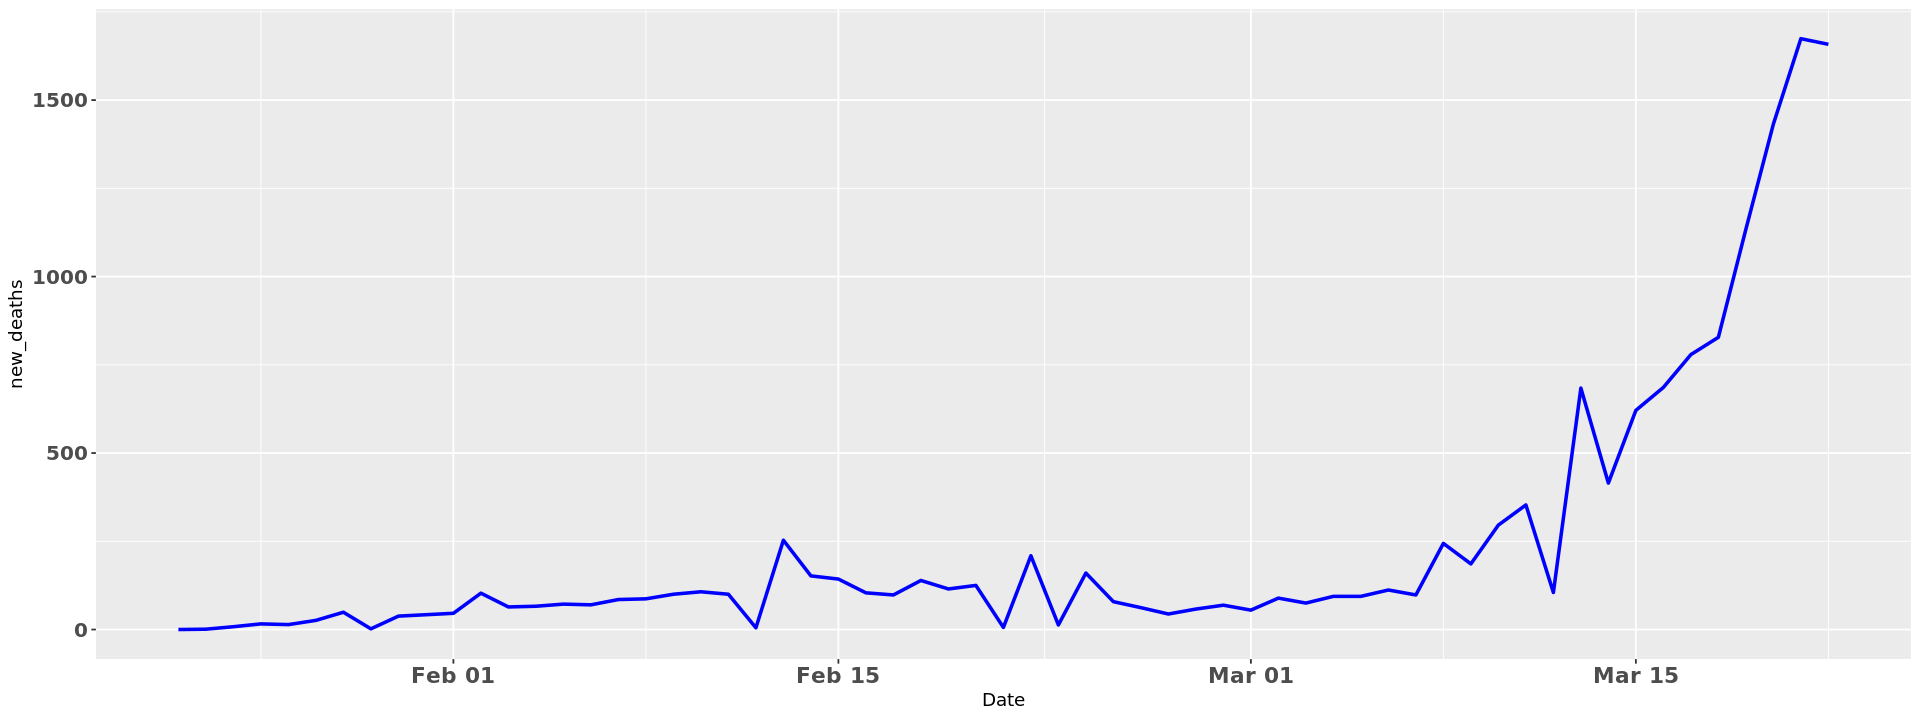

In [55]:
covid19 %>%
        group_by(Date) %>%
        summarize(new_deaths = sum(new_deaths)) %>%
ggplot(mapping = aes(x = Date, y = new_deaths)) +
        geom_line(size = 1, color = 'blue') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

### Evolution de la situation en Algérie:

#### Comparaison de l'évolution de la maladie avec nos voisins les plus touchés:

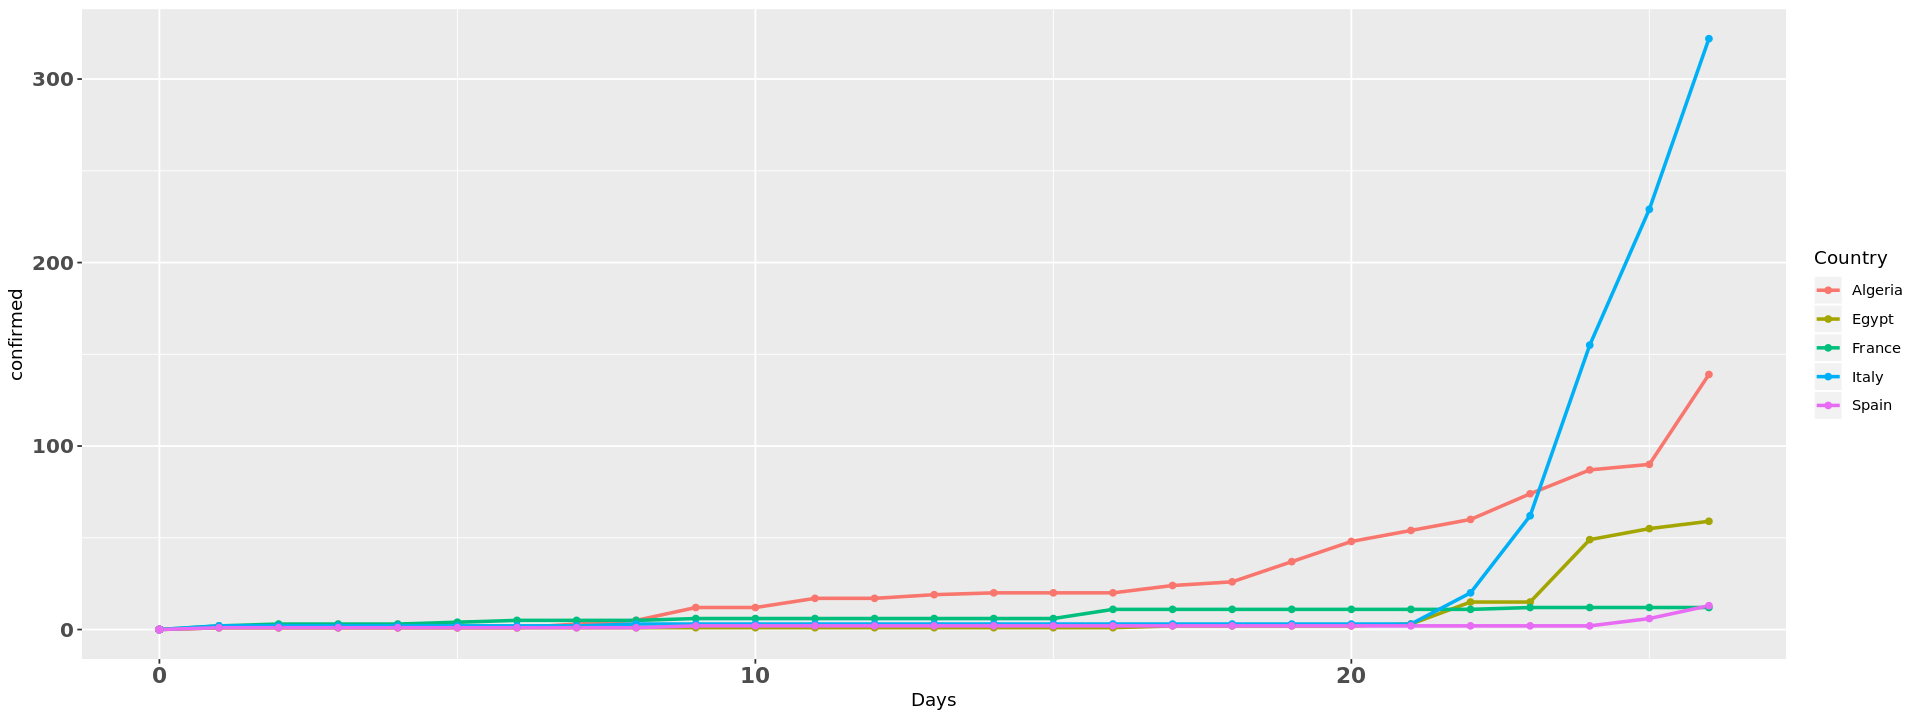

In [28]:
covid19 %>%
        filter(Country %in% c('France', 'Algeria', 'Italy', 'Spain', 'Egypt'), Days <=26) %>%
        group_by(Country, Date, Days) %>%
        summarize(confirmed = sum(confirmed)) %>%
ggplot(mapping = aes(x = Days, y = confirmed, color = Country)) +
        geom_line(size = 1) +
        geom_point() +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))


### Algérie

#### Resumé de la situation à la date du 22 mars 2020:

In [33]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(Confirmed = sum(confirmed),
                  Deaths = sum(deaths),
                  Recovered = sum(recovered),
                  'Active Cases' = sum(active_cases)) %>%
        mutate('Death Rate 1 (%)' = round(100 * Deaths/Confirmed, 2),
               'Death Rate 2 (%)' = round(100 * Deaths/(Deaths + Recovered), 2),
               'Recovered Rate (%)' = round(100 * Recovered/(Deaths + Recovered), 2)) %>%
        filter(Date == max(Date))
# Death Rate Corrigé: Nathan Uyttendaele (Chat Sceptique).
# Docteur en statistiques et vulgarisateur scientifique.


Date,Confirmed,Deaths,Recovered,Active Cases,Death Rate 1 (%),Death Rate 2 (%),Recovered Rate (%)
2020-03-22,201,17,65,119,8.46,20.73,79.27


### Visualisation des données pandémiques en Algérie:

#### Indicateur de suivis de la pandémie:

##### Évolution du nombre cumulé de cas COVID-19 confirmé:

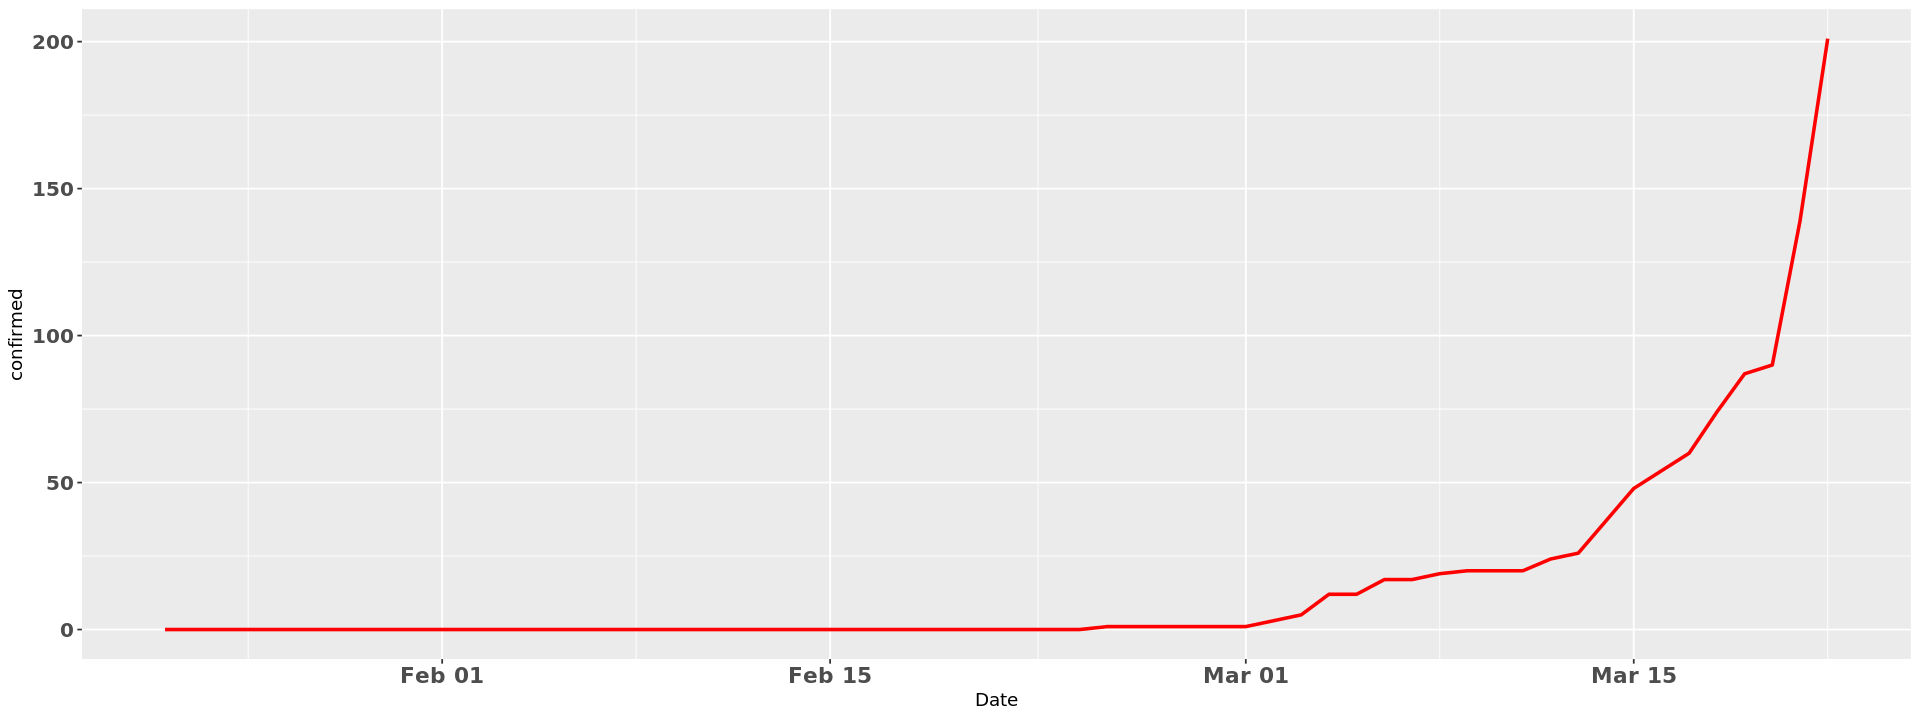

In [43]:
options(repr.plot.width = 16, repr.plot.height = 6)
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(confirmed = sum(confirmed)) %>%
ggplot(mapping = aes(x = Date, y = confirmed)) +
        geom_line(size = 1, color = 'red') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre cumulé de décès causer par le COVID-19:

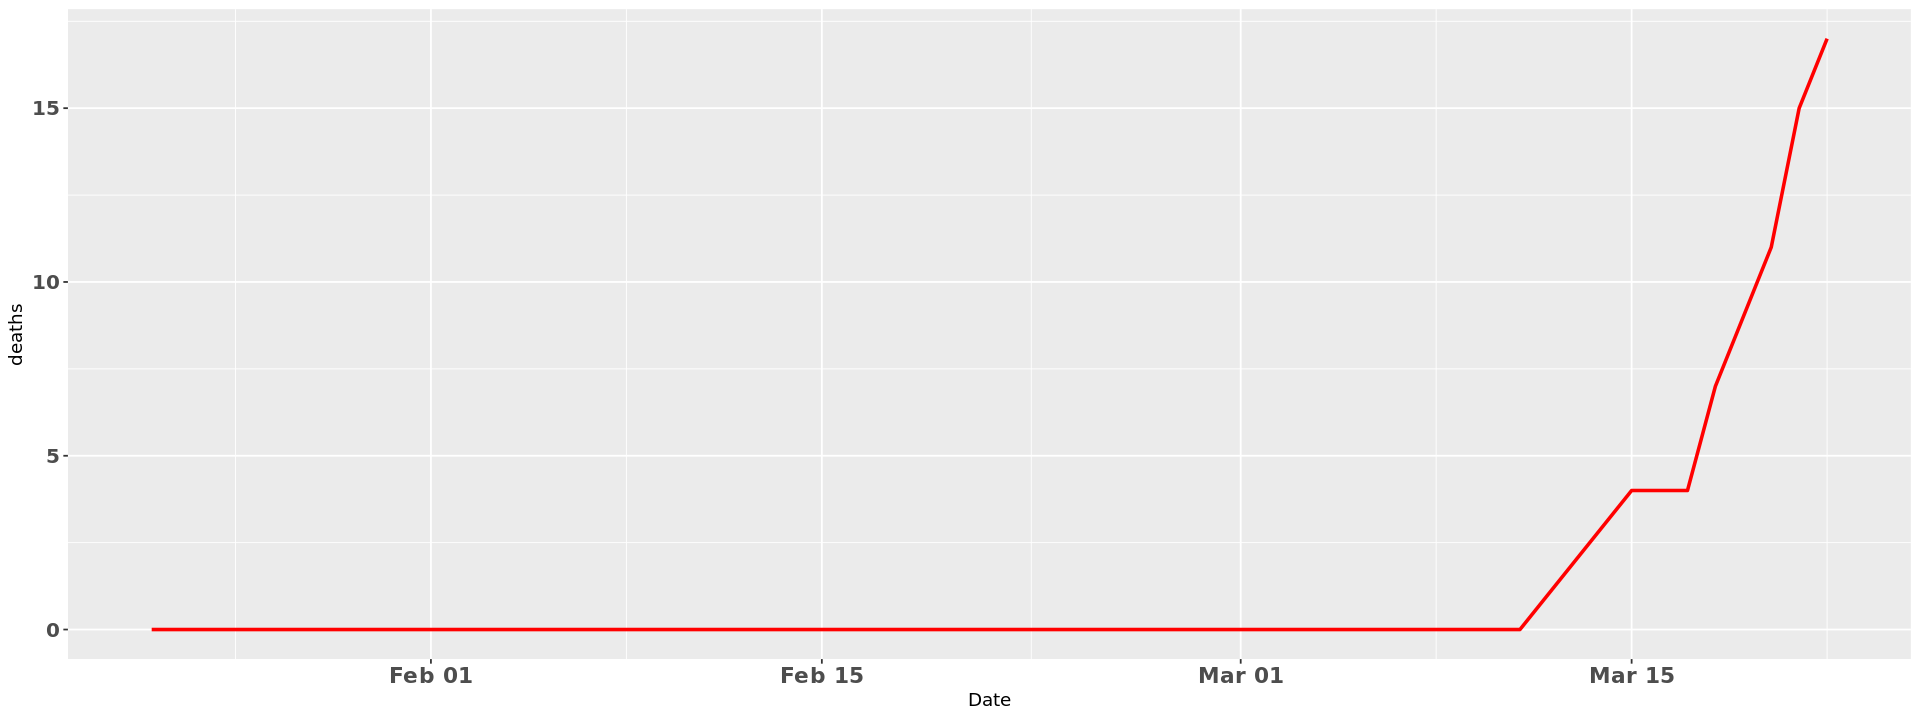

In [44]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(deaths = sum(deaths)) %>%
ggplot(mapping = aes(x = Date, y = deaths)) +
        geom_line(size = 1, color = 'red') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre cumulé de cas COVID-19 guérie:

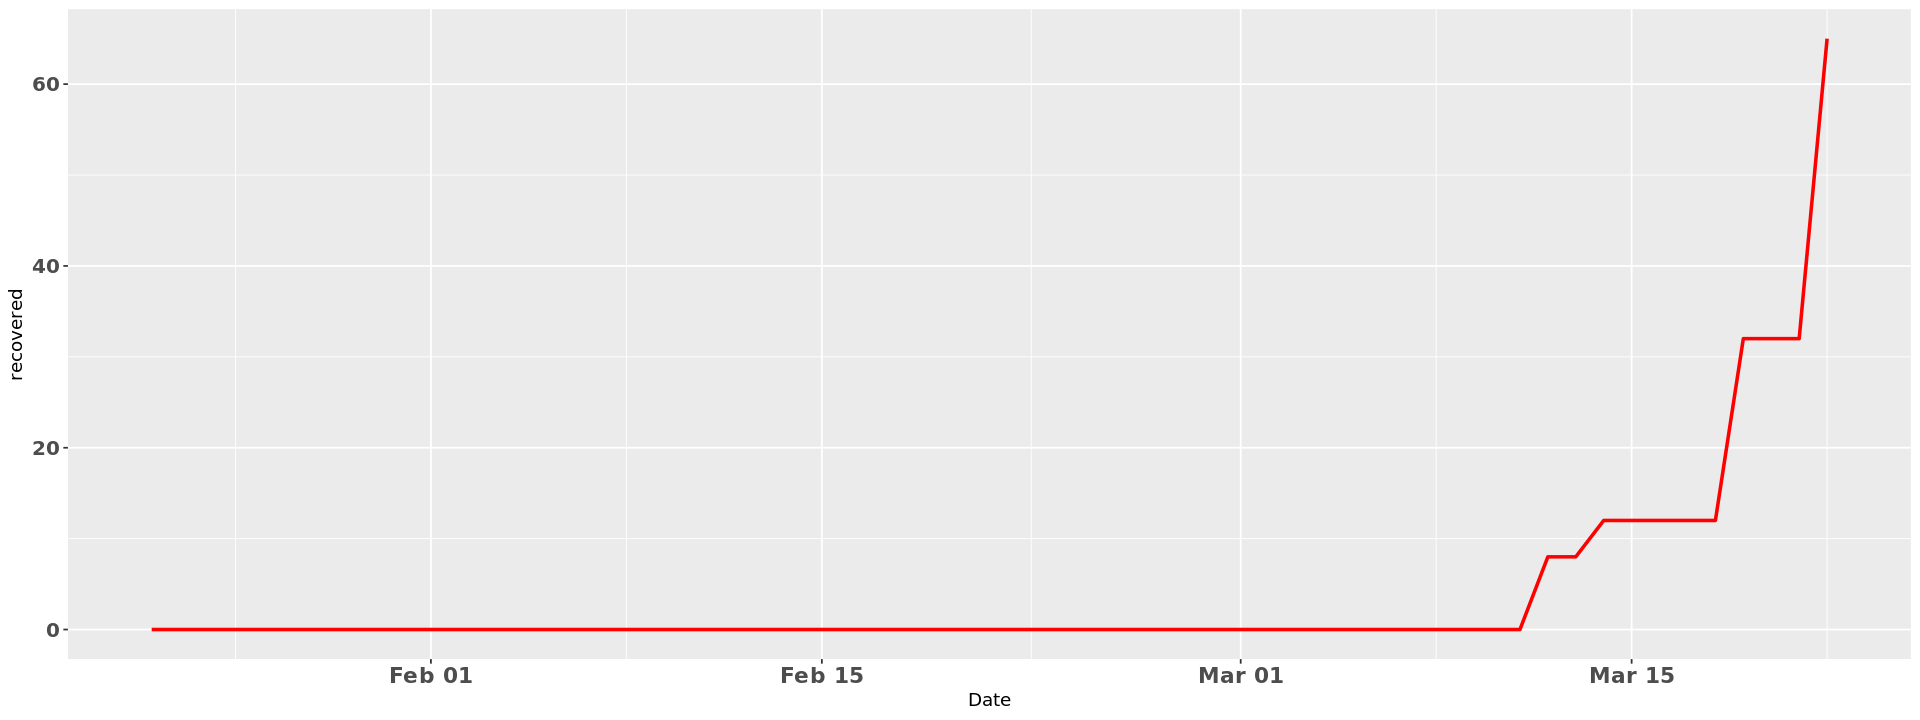

In [45]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(recovered = sum(recovered)) %>%
ggplot(mapping = aes(x = Date, y = recovered)) +
        geom_line(size = 1, color = 'red') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du taux de mortalité (Death Rate 1):


$$
\mbox{Death Rate 1} = 100 \times \frac{\mbox{Deaths}}{\mbox{Confirmed}}
$$

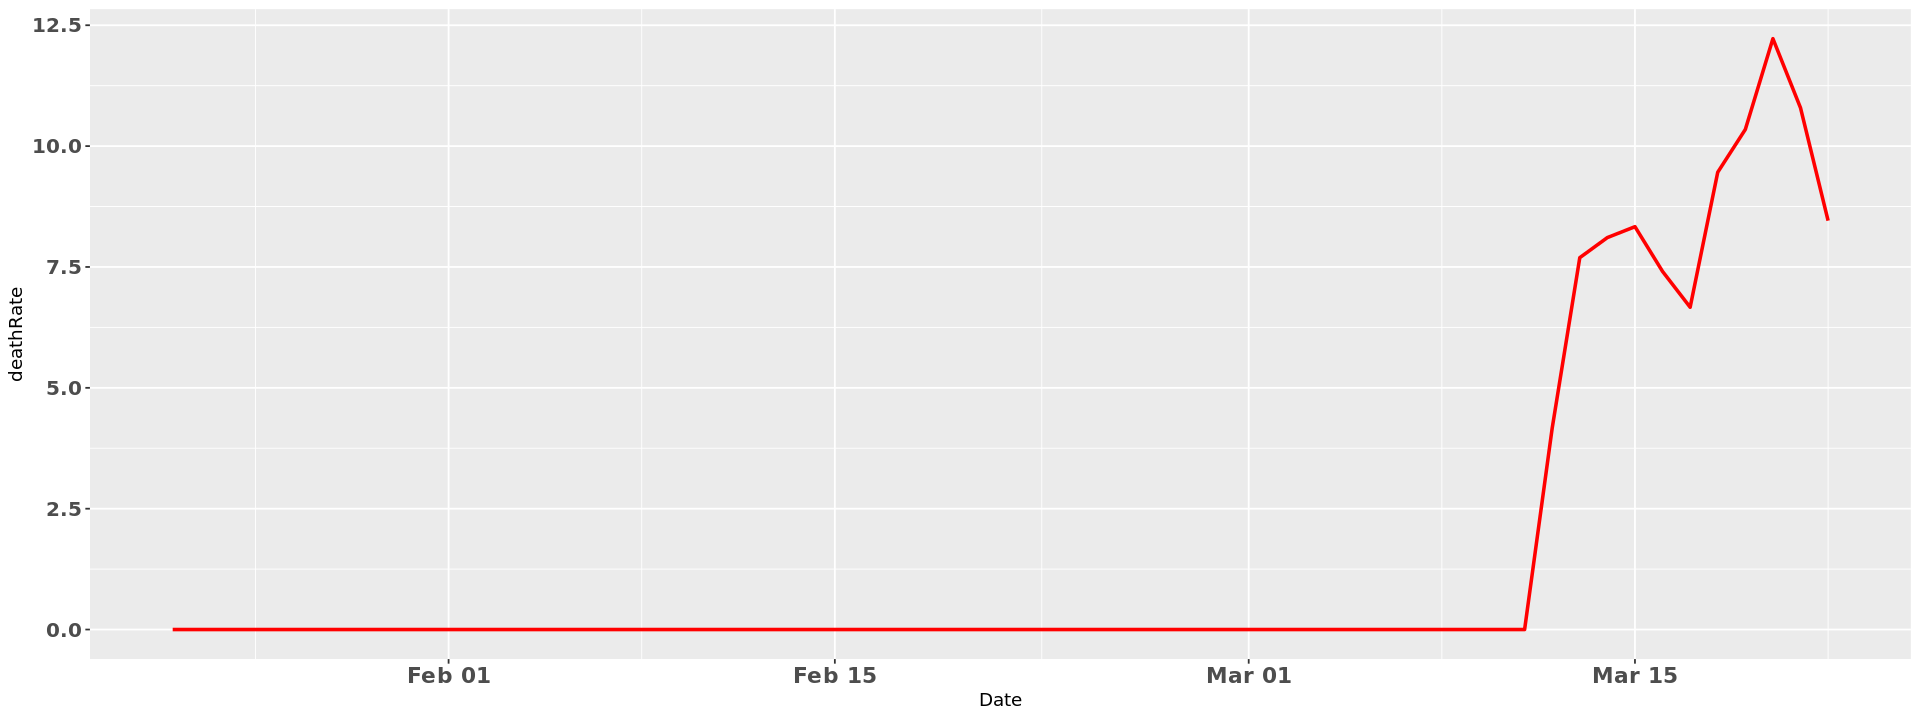

In [46]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(confirmed = sum(confirmed), deaths = sum(deaths)) %>%
        mutate(deathRate = 100*deaths/confirmed) %>%
        replace_na(replace = list(deathRate = 0))%>%
ggplot(mapping = aes(x = Date, y = deathRate)) +
        geom_line(size = 1, color = 'red') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du taux de mortalité (Death Rate 2):

$$
\mbox{Death Rate 2} = 100 \times \frac{\mbox{Deaths}}{\mbox{Deaths} + \mbox{Recovered}}
$$


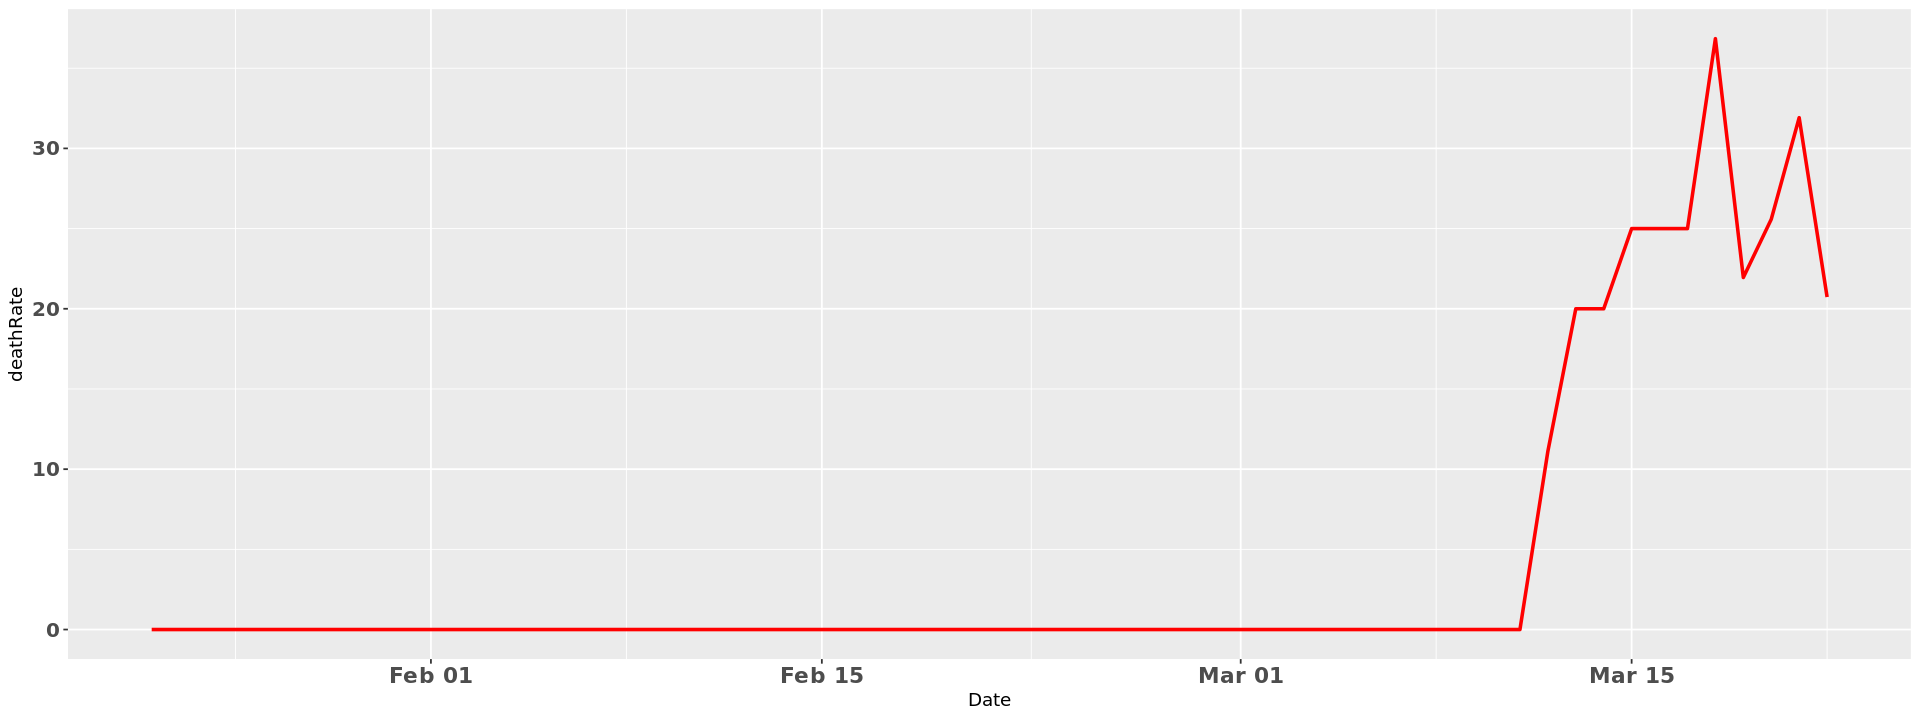

In [47]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(confirmed = sum(confirmed), deaths = sum(deaths), recovered = sum(recovered)) %>%
        mutate(deathRate = 100*deaths/(deaths + recovered)) %>%
        replace_na(replace = list(deathRate = 0))%>%
ggplot(mapping = aes(x = Date, y = deathRate)) +
        geom_line(size = 1, color = 'red') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre cas COVID-19 actifs:

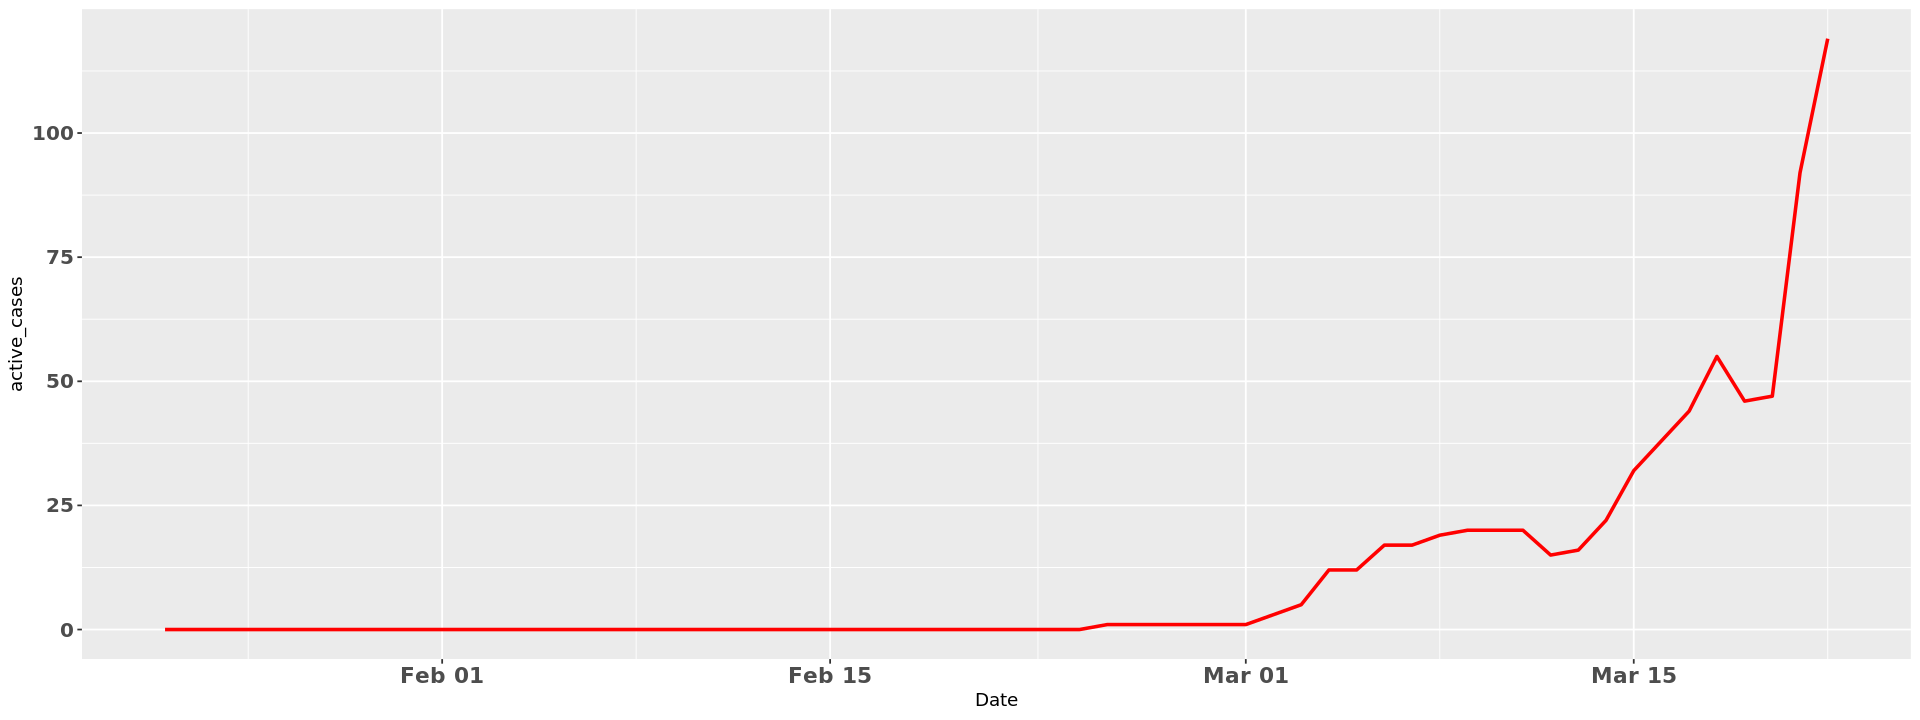

In [48]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(active_cases = sum(active_cases)) %>%
ggplot(mapping = aes(x = Date, y = active_cases)) +
        geom_line(size = 1, color = 'red') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

#### Indicateur de suivis de l'impacte des mesures prises par l'état:

In [49]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize('New Confirmed' = sum(new_confirmed),
                  'New Deaths' = sum(new_deaths),
                  'New Recovered' = sum(new_recovered),
                  'Active Cases' = sum(active_cases)) %>%
        filter(Date >= parse_date_time('03-16-2020', 'mdy')) %>%
        arrange(desc(Date))

Date,New Confirmed,New Deaths,New Recovered,Active Cases
2020-03-22,62,2,33,119
2020-03-21,49,4,0,92
2020-03-20,3,2,0,47
2020-03-19,13,2,20,46
2020-03-18,14,3,0,55
2020-03-17,6,0,0,44
2020-03-16,6,0,0,38



##### Évolution du nombre de nouveaux cas COVID-19 dépisté:

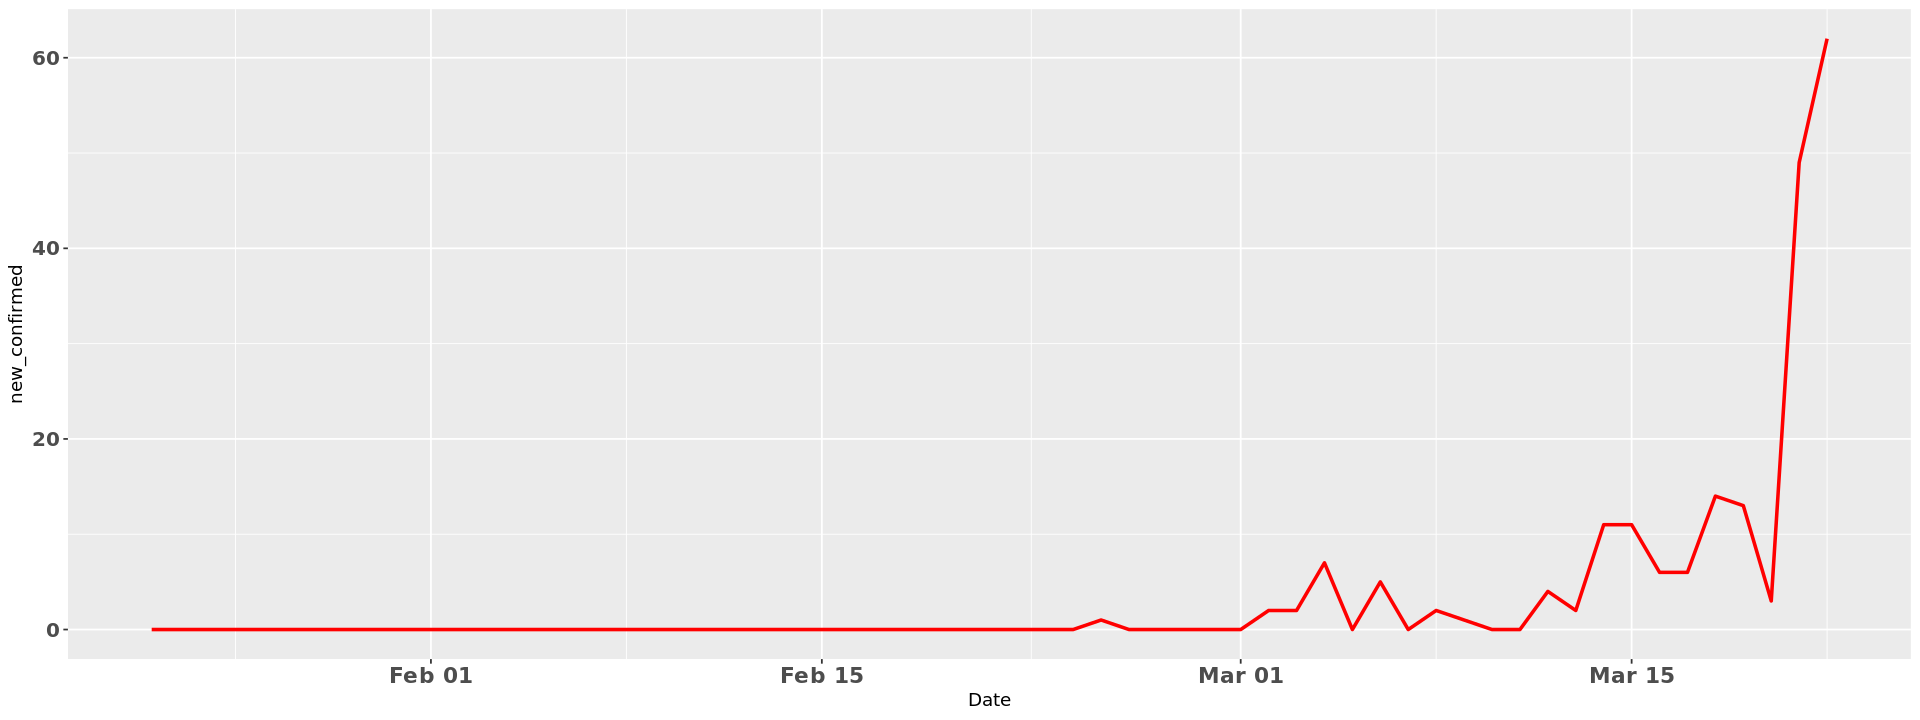

In [56]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(new_confirmed = sum(new_confirmed)) %>%
ggplot(mapping = aes(x = Date, y = new_confirmed)) +
        geom_line(size = 1, color = 'red') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre de nouveaux décès COVID-19 enregistré:

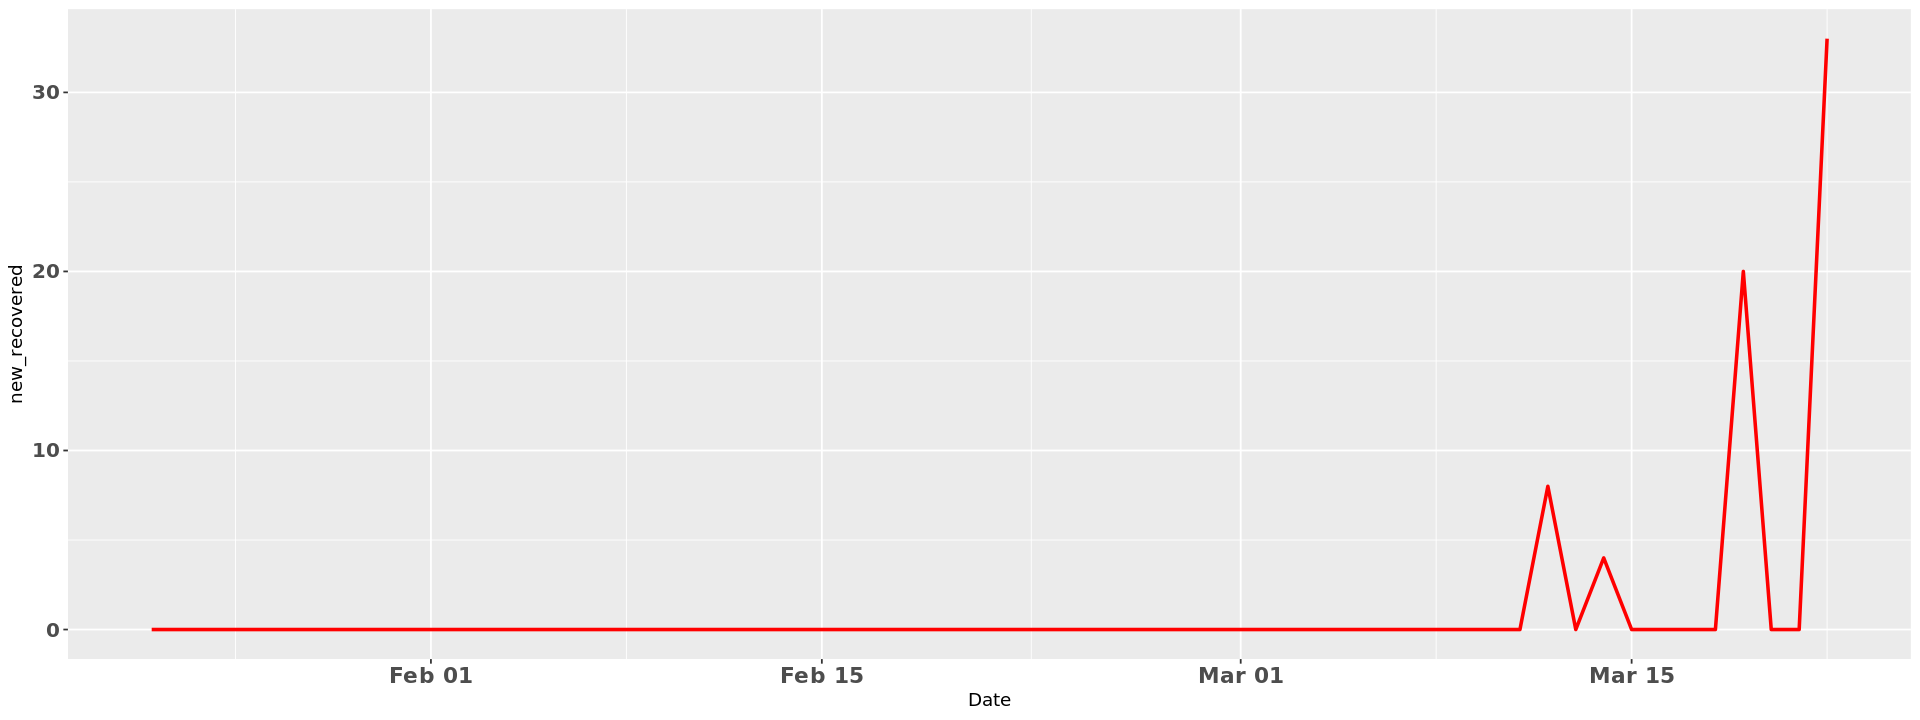

In [57]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(new_recovered = sum(new_recovered)) %>%
ggplot(mapping = aes(x = Date, y = new_recovered)) +
        geom_line(size = 1, color = 'red') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))

##### Évolution du nombre de nouveaux cas COVID-19 géris:

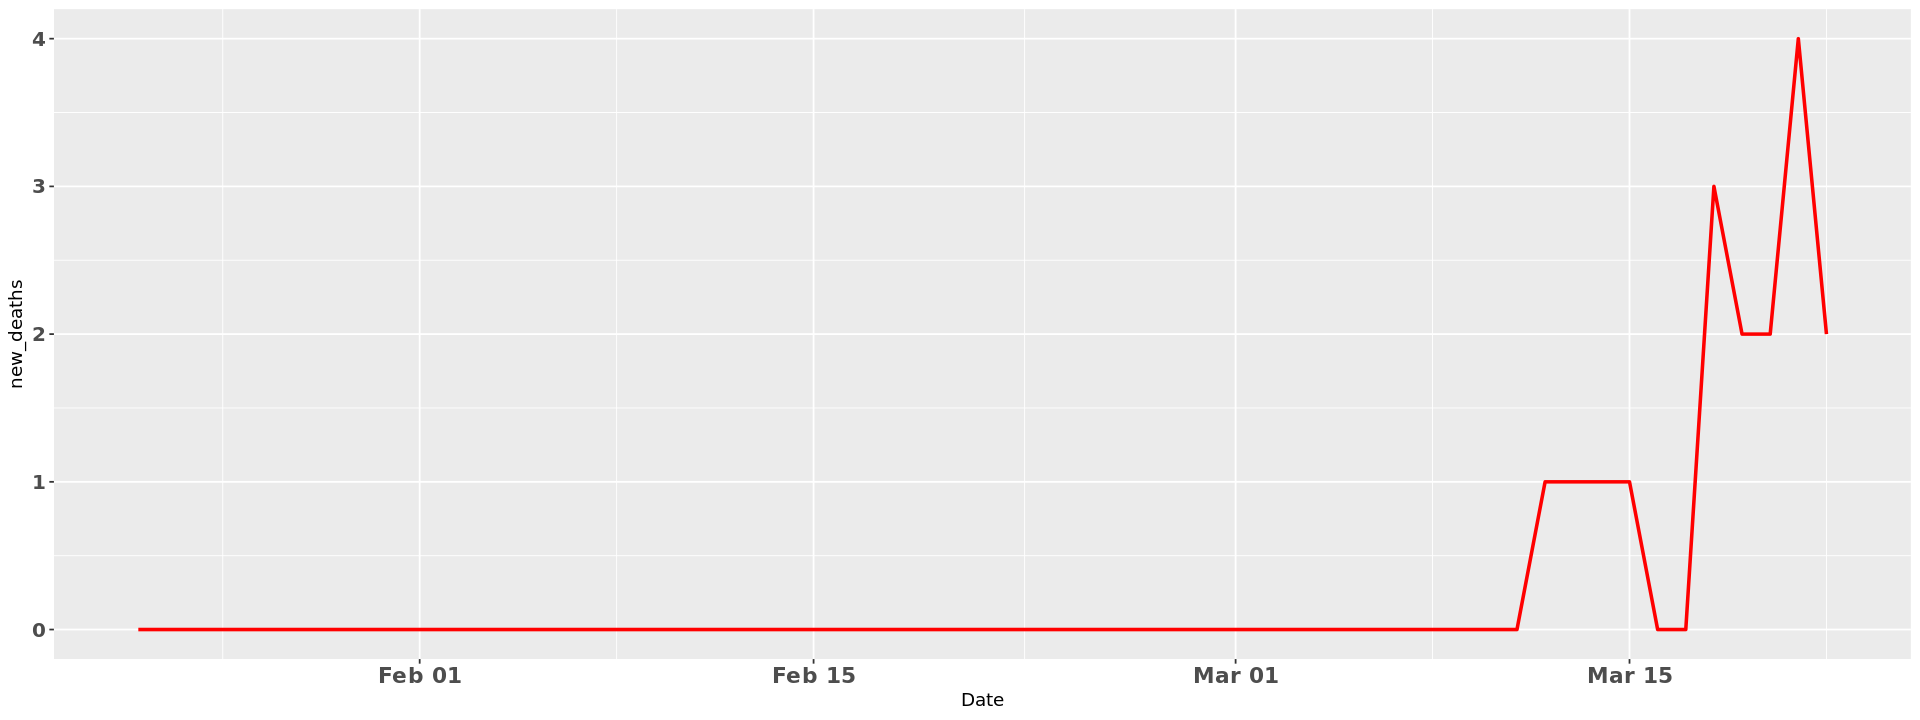

In [58]:
covid19 %>%
        filter(Country == 'Algeria') %>%
        group_by(Date) %>%
        summarize(new_deaths = sum(new_deaths)) %>%
ggplot(mapping = aes(x = Date, y = new_deaths)) +
        geom_line(size = 1, color = 'red') +
        theme(axis.text.y = element_text(size=12, face='bold'),
             axis.text.x = element_text(size=13, face='bold'))